# Import Common Package

In [74]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

import warnings 
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 100)

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Import dataset

In [16]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/tweet_train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Doing some EDA

In [18]:
# a little exploration data
rw, col = df.shape 
print(f'The Data has {rw} rows and {col} columns')

The Data has 7613 rows and 5 columns


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [20]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [53]:
# setting stopwords / stemmer
sw = stopwords.words('english')
stemmer = PorterStemmer()

arr_disaster = []

for i in df[df['target'] == 1].text:
    words = word_tokenize(i)
    # filtering tweets
    filtered_tweets = [stemmer.stem(word) for word in words if word not in sw and word.isalpha()]
    arr_disaster.append(filtered_tweets)

flatten = [item for sublist in arr_disaster for item in sublist]

# creating series
unique_words_disaster = pd.Series(flatten).value_counts()

frequent_words_disaster = unique_words_disaster[:]
top_10_most_frequent_disaster = frequent_words_disaster[:10]

fig = px.bar(x=top_10_most_frequent_disaster.index, y=top_10_most_frequent_disaster.values, color=top_10_most_frequent_disaster.index, 
             title="Most Frequent Top 10 : Disaster", labels=dict(x="Words", y="Count of Words"))
fig.show()

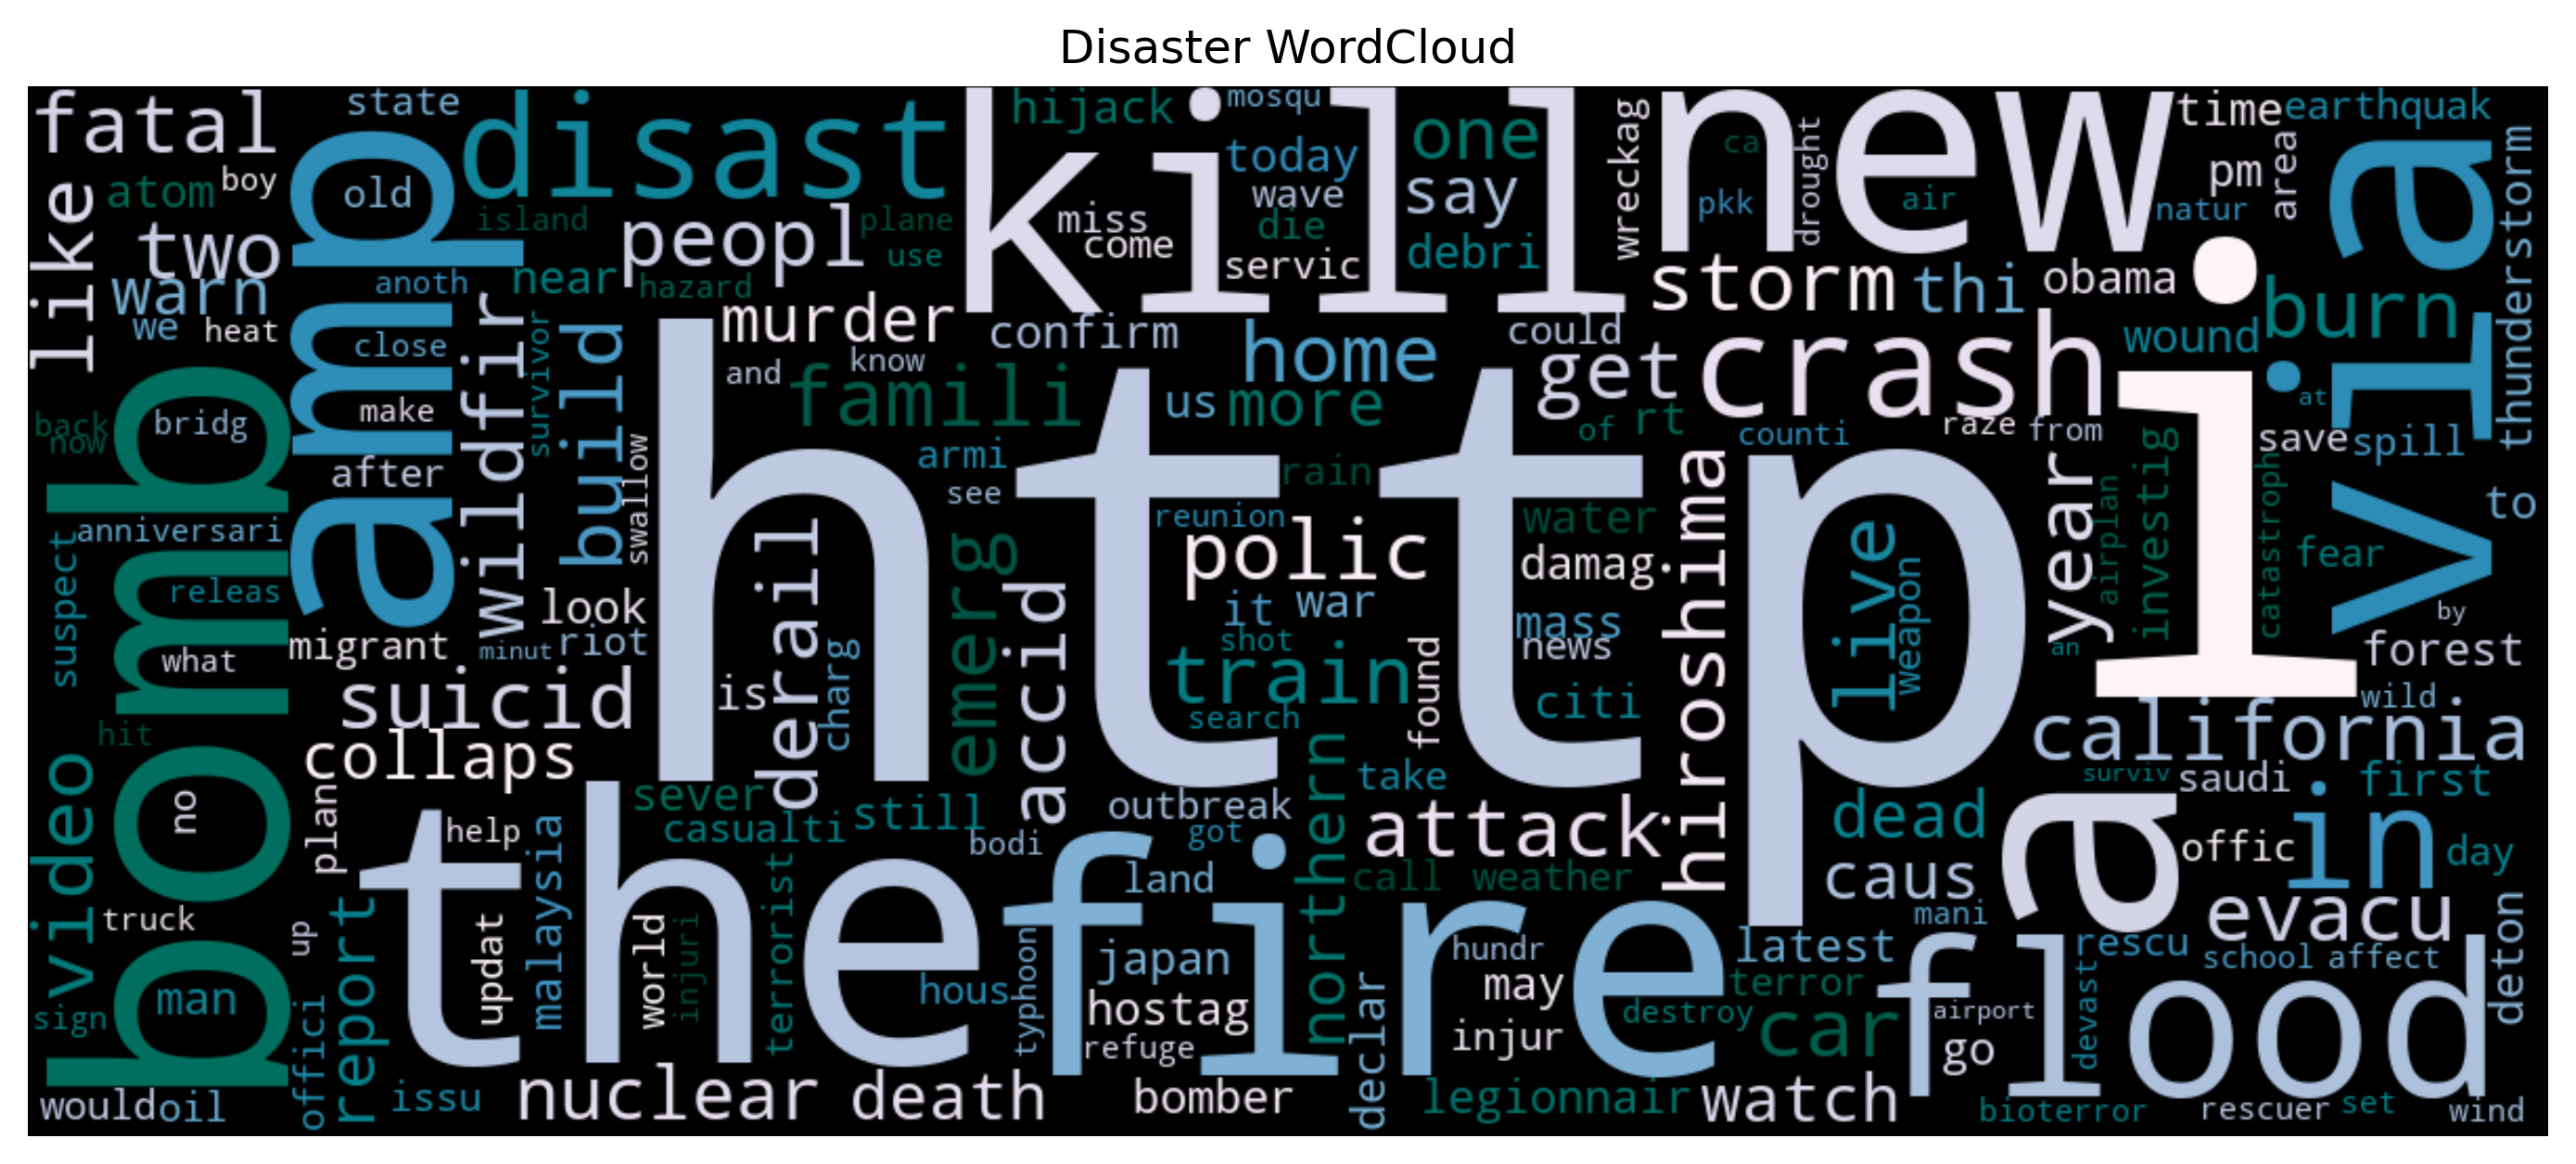

In [62]:
arr_count_words = {}

for i in flatten:
  arr_count_words[i] = arr_count_words.get(i, 1) + 1

wc = WordCloud(width=1200, height=500, 
              collocations=False, 
              relative_scaling=0,
              background_color="black", 
              colormap="PuBuGn").generate_from_frequencies(arr_count_words)

plt.figure(figsize=(15,5), dpi=300)
plt.title('Disaster WordCloud')
plt.imshow(wc, interpolation='bilinear', alpha=1)
_ = plt.axis("off")



# Create Simple Model using multiple algorithms

In [76]:
vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(df["text"])

y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.25, random_state=0)

In [80]:
arr_algo = [
    GaussianNB(),
    MultinomialNB(),
    LogisticRegression(solver='lbfgs'),
    SVC(kernel='sigmoid', max_iter=500)
]

score_agg = {
    'algo': ['Gaussian NB', 'Multinomial NB', 'Logistic Regression', 'SVC'],
    'accuracy' : [],
    'precision' : [],
    'recall':[],
    'f1 score': []
}

for algo in arr_algo:
  algo.fit(X_train, y_train)
  y_pred = algo.predict(X_test)

  score_agg['accuracy'].append(round(accuracy_score(y_test, y_pred),2))
  score_agg['precision'].append(round(precision_score(y_test, y_pred),2))
  score_agg['recall'].append(round(recall_score(y_test, y_pred),2))
  score_agg['f1 score'].append(round(f1_score(y_test, y_pred),2))

score_df = pd.DataFrame(score_agg, index=None)




In [81]:
score_df.head()

,algo,accuracy,precision,recall,f1 score
0,Gaussian NB,0.62,0.53,0.81,0.64
1,Multinomial NB,0.80,0.79,0.72,0.75
2,Logistic Regression,0.82,0.83,0.70,0.76
3,SVC,0.48,0.41,0.57,0.48
